## **Let's dive deep into Feed-Forward Networks!**
🦫KURW.AI💗

---

Venchislaw 2024.

### 1) Intro for Nerds
---

Human brain is incredible.<br>
It can learn complex patterns by building complex neuron connections.<br>
Yet we don't 100% now how brain works, we can build digital model of neuron and __network of neurons__<br>
To build digital model of Neuron we should understand how biological one works.<br>
I'm not a neuro-scientist, but I remember biology lesson at school about neurons<br>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*K1ee1SzB0lxjIIo7CGI7LQ.png" width=30%><br>
Ommiting biological details we can describe neuron in few words as a cell recieving information with dendrites from past neurons and either "firing" electrical signal or not. Neuron then passes its processed information with synapses to the following neurons.<br>
Once again, model requires simplification, so we can look at a neuron as at a "tiny unit that intakes some information and returns processed inputs.<br>
The only question is "processing".<br>
What should we do?<br>
Neural Network consists of neurons, so it's better to think about one single unit.<br>

### 2) Neuron Model

---

To the moment of building neuran model humanity was already aware of "linear models".<br>
That's exactly what scientists decided to use.<br>
For the model of neuron they picked linear model with "activation function" applied to it.<br>
If you don't remember how linear model looks I can remind you quickly:<br>
$$a = \sum^n_{i=0} \theta _ix_i$$
where $x_0 = 1$ (to learn bias)<br>
What is this "activation function"?<br>
Biological Neuron is binary, it's either on or off.<br>
Activation Function in this case is a __step function__.<br>
It's 1 for input > threshold and 0 for input < threshold.<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/HardLimitFunction.png/400px-HardLimitFunction.png" width=30%><br>
As you can see from this picture we have a 0 threshold.<br>
However, custom threshold is not a problem for us.<br>
**Threshold = - bias**
This is to say, our linear computation already includes threshold.<br>

### 3) Perceptron

Perceptron is the first model of biological neuron.<br>
Invented in 1958 it applied all practices described above with a pretty interesting learning rule.<br>
Perceptron model is used for supervised binary classification task.<br>
__How it works:__<br>
It does absolutely the same thing, but to tune hyperparameters it follows the following rule:<br>
- If prediction is correct (1-1 or 0-0) we do not change weights
- If prediction is wrong:
- - False Positive:<br>
        This means our linear output is over the threshold<br>
        We subtract scaled input feature vector from parameters<br>
- - False Negative:<br>
        This means our linear output is under the threshold<br>
        We add up scaled input feature vector to parameters<br>

**NOTE: Perceptron process each sample individually.**<br>
This method tunes parameters close enough to the desired values.<br>
### Let's build one!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
Here I generate simple dummy dataset.<br>
"""
np.random.seed(23)

num_samples = 1000
num_features = 10

X = np.random.randn(num_samples, num_features)
weights = np.random.randn(num_features)
bias = 0.5
y = (np.dot(X, weights) + bias > 0).astype(int)

print("Shapes:")
print(X.shape, y.shape)
print("="*50)
print(X[:5], y[:5])
print("="*50)
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

Shapes:
(1000, 10) (1000,)
[[ 0.66698806  0.02581308 -0.77761941  0.94863382  0.70167179 -1.05108156
  -0.36754812 -1.13745969 -1.32214752  1.77225828]
 [-0.34745899  0.67014016  0.32227152  0.06034293 -1.04345    -1.00994188
   0.44173637  1.12887685 -1.83806777 -0.93876863]
 [-0.20184052  1.04537128  0.53816197  0.81211867  0.2411063  -0.95250953
  -0.13626676  1.26724821  0.17363364 -1.22325477]
 [ 1.41531998  0.45771098  0.72887584  1.96843473 -0.54778801 -0.67941827
  -2.50623032  0.14696049  0.60619549 -0.02253889]
 [ 0.01342226  0.93594489  0.42062266  0.41161964 -0.07132392 -0.04543758
   1.04088597 -0.09403473 -0.42084395 -0.55198856]] [0 0 1 0 1]
[[  0 478]
 [  1 522]]


In [3]:
"""
And Here I build Perceptron Neuron!
"""

class Perceptron:
    def __init__(self):
        self.bias = 0

    def fit(self, X, y):
        self.weights = np.zeros((1, X.shape[1]))

        for sample in zip(X, y):
            prediction = np.dot(self.weights, sample[0]) + self.bias
            activated = prediction > 0

            self.weights += (sample[1] - activated) * sample[0]
            self.bias += (sample[1] - activated) * 1
        
        return self.weights, self.bias
    
    def predict(self, X):
        prediction = np.dot(self.weights, X.T) + self.bias
        return np.array(prediction > 0).astype(int)

In [4]:
perceptron = Perceptron()
perceptron.fit(X, y)

(array([[-13.58053614,  -0.07006142,  -0.82743697,  10.69942632,
           1.26320988,  -8.41174634,   2.87887913,  -6.40411674,
           6.93203191,  -4.31050118]]),
 array([2]))

In [5]:
y_pred = perceptron.predict(X).flatten()

In [6]:
wrong = 0
for pair in zip(y, y_pred):
    if pair[0] != pair[1]:
        wrong += 1
    
print(wrong)

73


73 Misclassifications are not bad, but...<br>
This is the training set it's seen.

### 4) Weakness of Perceptrons.

Perceptrons are not suitable for neural networks.<br>
1) Good Weights do not guarantee good outputs.
2) Sample-by-sample processing is inefficient for larger scale
3) Learning Rule of perceptron can not be scaled for multi-layer architecture (of a neural net)

You can hear people calling Feed-Forward Neural Network an **MLP (Multi-Layer Perceptron)**, but it's wrong<br>
They have nothing to do with Perceptron unit.<br>
This is one of those historical-convention naming issues (like one with Logistic Regression).<br>
They use gradient-descent for updates and the chain rule...<br>
Oops, spoiler here!

### 5) Linear Model with fancy activators.

Lineaar Model is simple enough.<br>
Instead of *weird* learning algorithm of Perceptron we use Gradient Descent optimization.<br>
However, our step activation function is too sharp (its derivation is 0)<br>
To address this issue scientists used to use sigmoid function (function returning values between 0 and 1)<br>
Its outputs can be interpreted as probabilities of positive class.<br>
$$a = {1 \over {1 + e^{-z}}}$$

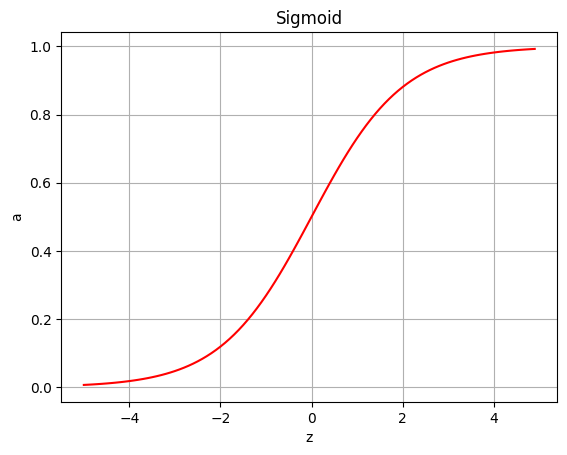

In [7]:
z = np.arange(-5, 5, 0.1)
a = 1 / (1 + np.exp(-z))

plt.title("Sigmoid")
plt.xlabel("z")
plt.ylabel("a")
plt.grid()
plt.plot(z, a, c="red");

I'm not sure if it's safe enough to call sigmoid **smoother** version of step function, but I'll take this risk.<br>
I just can't ignore their similarity.<br>
However, another activation function called **ReLU** (Rectified Linear Unit) appeared to work better<br>
We can think of it as of step function with continuous values above threshold.

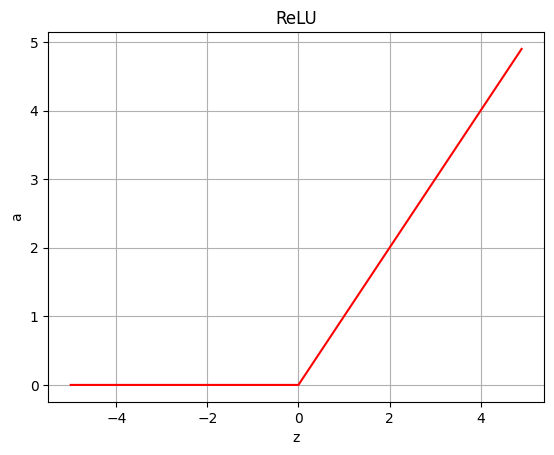

In [8]:
a = np.maximum(z, 0)

plt.title("ReLU")
plt.xlabel("z")
plt.ylabel("a")
plt.grid()
plt.plot(z, a, c="red");

Derivation is simple and practical.<br>
It's 1 for values above 0 and 0 for values under 0.<br>
This property prevents gradient vanishing (with values in range 0 to 1 it is a problem).<br>

I don't think it worth building this neuron in vacuum.<br>
Because it's a simple linear model (quite simmilar to logistic regression)

### 6) Let's Put it all together.

Now we now all nerdy stuff.<br>
This is the core part, where we build Feed-Forward Neural Network from scratch.<br>

---
**ARCHITECTURE**
Feed-Forward Neural Networks are built of stacked dense layers.<br>
Each layer consists of linear neuron units(discussed above) with some activation function.<br>
Each Neuron in layer recieves outputs of all neurons from the past layer as input and returns one value.<br>
This value is passed as input to all neurons in the next layer.<br>
NOTE: Neurons in layer are not connected to each other.<br>
<img src="https://mukulrathi.com/static/648e5207805f95bf09c330a43d89d295/f207c/neural-net.png" width=50%><br>

---
**MATH DETAILS**
Feed-Forward Network learning process includes 2 parts: forward propagation & backward propagation.<br>
On forward pass we make all calculations to make a prediction.<br>
On backward pass we compare our prediction with desired output and tune parameters to get better prediction on the next forward pass.<br>
Let's find out where these names come from!<br>
#### Forward Propagation:
To simplify explanation let's go through the network depicted above.<br>
It consists of 3 layers (typically we do not count input layer).<br>
3 Neurons in input layers mean we take 3 features for input (like area, condition, floors for house pricing prediction task).<br>
Then we have 2 hidden layers with 4 neurons in each.<br>
These layers are called hidden, because we can see their outputs.<br>
These sting-like connections are our weights.<br>
It makes sense, because for 4 neurons each recieving 3 features as input we need 12 weights.<br>
To each neuron we pass 3 features scaled by corresponding 3 weights. Then we add bias.<br>
Raw linear output is calculated as:<br>
$$z = \sum_i^n{w_ix_i} + b$$
Activated value is:<br>
$$a = ReLU(z) = max(0, z)$$
_VECTORIZATION_
Remember, we work with bunch of neurons and... multiple samples ($m$)<br>
SHAPES:<br>
Weights are represented with matrix with (n_neurons, n_inputs) for layer.<br>
For example, for the 1st layer it's (4, 3) - 4 neurons in this layer with 3 neurons passed as input.<br>
Input data shape is (m_samples, n_features) **BUT!** For mathematical convenience we're gonna use Transpose of input, so it's (n_features, m_samples).<br>
Biases are vectors of shape (n_neurons,)<br>
Output Z has a shape of (n_neurons, m_samples)<br>
Z Calculation:<br>
For each neuron we take inputs, scale them by corresponding weights and add them up (and add bias of course)<br>
For n_neurons it is a dot product!<br>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*WU7efDAqEb_tKFg2DaOwhA.png" width=40%><br>
LAYER 1:
$$Z_1 = WX + b1$$
W shape: (n_neurons, n_features)<br>
X shape: (n_features, m_samlpes)<br>
Z shape: (n_neurons, m_samples) - outer shape.<br>
This implies for the 2nd neuron.<br>
$$A_1 = ReLU(Z)$$
LAYER 2:
$$Z_2 = W_2A_1 + b2$$
$$A_2 = ReLU(Z_2)$$
But here instead of input data we intake outputs of the first neuron.<br>

On Forward Pass we go from left to right through our network.<br>
That's where its name comes from. We do not tune any parameters, we just get the output.<br>

#### Bacward Propagation.
On Backward Pass our neural network tunes its parameters to maximize simmilarity of desired outputs and actual predictions.<br>
During this process Network extracts patterns in the data.<br>
Neural Network due to its scale learns complex and deep representations.<br>
How do we learn these parameters?<br>
**Cost Function**
*And so the big idea is the cost function.<br> That's the big idea, the cost function is a way of measuring the performance<br> of the system according to some measure, whether that is a big actually, let me think,<br> is that is that one a difficult idea to arrive at?*<br> - Ilya Sutskever about Cost Function concept.<br>
Cost Function is a function that measures difference between desired output and real preidction.<br>
Higher values of cost function are typically a sign of poor performance.<br>
Cost Function Concept deserves more attention (and I hope you are familiar with it from traditional Machine Learning, otherwise I recommend to start from simpler models).<br>
This very Cost Function rates how good our model performs.<br>
In DL we have a hand of cost functions that work well & those functions are convex, so we can find their minimum (parameter values that result in minimum output of cost function)<br>
Example of Cost Function:<br>
<img src="https://global.discourse-cdn.com/dlai/original/3X/1/3/133adb05a8ab320f2d069daacaa20f21bbe63a9d.jpeg" width=40%><br>

---

#### Structure

Keras structure is probably the easiest to undersand.<br>
It's better to implement API first and experiment with architectures.<br>
Without further ado

### 7) API.
Tensorflow Keras API is  simple & fancy.<br>
If you are not familiar with keras API it's simple.<br>
Core components:<br>
- Sequential Model class
- Dense Layer


In [9]:
import pandas as pd

In [10]:
df_train = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

In [11]:
X_train = np.array(df_train.drop(columns=["label"])) / 255.
y_train = df_train["label"]
X_test = np.array(df_test.drop(columns=["label"])) / 255.
y_test = df_test["label"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [12]:
X_train.max()

1.0

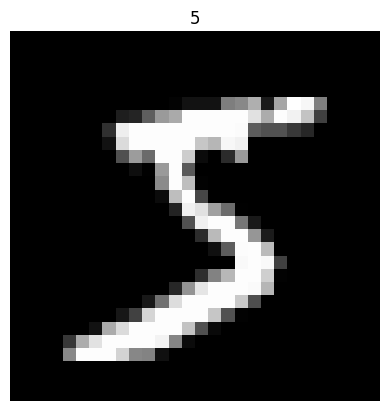

In [13]:
plt.title(y_train[0])
plt.axis("off")
plt.imshow(X_train[0].reshape(28, 28), cmap="grey");

In [14]:
def init_parameters():
    w1 = np.random.rand(28, 784) - 0.5
    w2 = np.random.rand(28, 28) - 0.5
    w3 = np.random.rand(10, 28) - 0.5
    b1 = np.zeros((28, 1))
    b2 = np.zeros((28, 1))
    b3 = np.zeros((10, 1))

    return w1, w2, w3, b1, b2, b3


def relu(z):
    return np.maximum(z, 0)

def softmax(z):
    return np.exp(z) / sum(np.exp(z))
    

def forward(X, w1, w2, w3, b1, b2, b3):
    z1 = np.dot(w1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(w3, a2) + b3
    a3 = softmax(z3)

    return z1, z2, z3, a1, a2, a3


def ohe_encode(y):
    Y = np.zeros((y.size, y.max()+1))
    Y[np.arange(y.size), y] = 1
    return Y.T


def relu_derivative(z):
    return z > 0


def backward(z1, a1, z2, a2, z3, a3, w2, w3, X, y):
    m = X.shape[1]  # it's (n, m) & we need m
    Y = ohe_encode(y)
    dz3 = a3 - Y
    dw3 = 1 / m * np.dot(dz3, a2.T)
    db3 = 1 / m * np.sum(dz3)

    dz2 = np.dot(w3.T, dz3) * relu_derivative(z2)
    dw2 = 1 / m * np.dot(dz2, a1.T)
    db2 = 1 / m * np.sum(dz2)

    dz1 = np.dot(w2.T, dz2) * relu_derivative(z1)
    dw1 = 1 / m * np.dot(dz1, X.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2, dw3, db3
    

def accuracy(y, pred):
    return np.sum(y == pred) / y.size


def nn_fit(X, y, iterations=500, learning_rate=0.1):
    X = X.T
    w1, w2, w3, b1, b2, b3 = init_parameters()
    for iteration in range(iterations):
        z1, z2, z3, a1, a2, a3 = forward(X, w1, w2, w3, b1, b2, b3)
        pred = np.argmax(a3, axis=0)
        acc = accuracy(y, pred)
        if iteration % 10 == 0:
            print(f"Iteration: {iteration} | Accuracy: {acc}")
        
        dw1, db1, dw2, db2, dw3, db3 = backward(z1, a1, z2, a2, z3, a3, w2, w3, X, y)
        # Update:
        w1 -= dw1 * learning_rate
        b1 -= db1 * learning_rate
        w2 -= dw2 * learning_rate
        b2 -= db2 * learning_rate
        w3 -= dw3 * learning_rate
        b3 -= db3 * learning_rate
        
    return w1, b1, w2, b2, w3, b3
        

In [15]:
w1, b1, w2, b2, w3, b3 = nn_fit(X_train, y_train)

Iteration: 0 | Accuracy: 0.06963333333333334
Iteration: 10 | Accuracy: 0.2344
Iteration: 20 | Accuracy: 0.35128333333333334
Iteration: 30 | Accuracy: 0.45165
Iteration: 40 | Accuracy: 0.52395
Iteration: 50 | Accuracy: 0.5802
Iteration: 60 | Accuracy: 0.6233166666666666
Iteration: 70 | Accuracy: 0.6571333333333333
Iteration: 80 | Accuracy: 0.6847833333333333
Iteration: 90 | Accuracy: 0.7063666666666667
Iteration: 100 | Accuracy: 0.7133166666666667
Iteration: 110 | Accuracy: 0.7150333333333333
Iteration: 120 | Accuracy: 0.7390833333333333
Iteration: 130 | Accuracy: 0.7509333333333333
Iteration: 140 | Accuracy: 0.7626166666666667
Iteration: 150 | Accuracy: 0.7733833333333333
Iteration: 160 | Accuracy: 0.7830166666666667
Iteration: 170 | Accuracy: 0.7925
Iteration: 180 | Accuracy: 0.8010833333333334
Iteration: 190 | Accuracy: 0.8070333333333334
Iteration: 200 | Accuracy: 0.81315
Iteration: 210 | Accuracy: 0.8188
Iteration: 220 | Accuracy: 0.8238833333333333
Iteration: 230 | Accuracy: 0.827

As you can see our accuracy improvements dicreased during training.
I could add EarlyStopping, but I'm lazy brah

In [18]:
_, _, _, _, _, a3 = forward(X_test.T, w1, w2, w3, b1, b2, b3)
a3 = np.argmax(a3, axis=0)

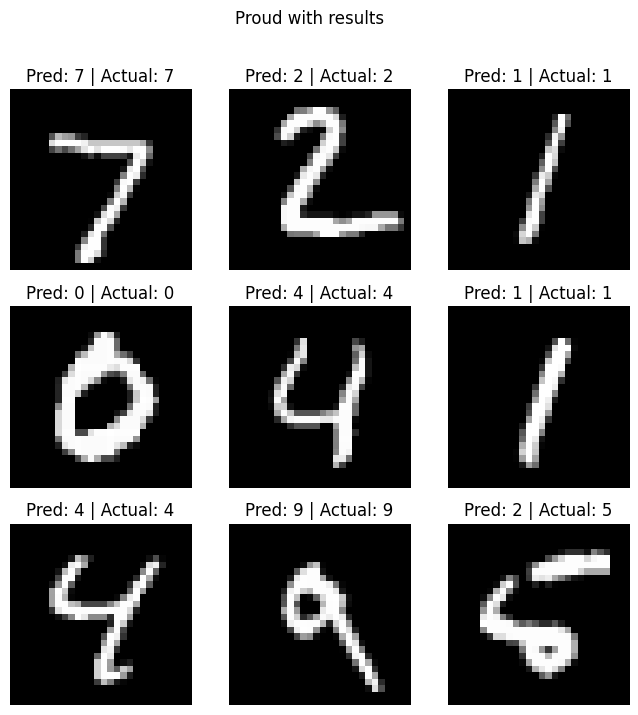

In [29]:
plt.figure(figsize=(8, 8))
plt.suptitle("Proud with results")
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.axis("off")
    plt.title(f"Pred: {a3[i]} | Actual: {y_test[i]}")
    plt.imshow(X_test[i].reshape(28, 28), cmap="grey");

<p align="center">
<img src="https://static-00.iconduck.com/assets.00/beaver-emoji-2048x2019-61w8w8mn.png" width=10%><br>
KurwAI Guides.<br>
MIT License.
</p>